In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Add the directory to the path so we can import the r-t modules
import sys
import os


#Add the src/radiation directory to the system path
sys.path.append(os.path.abspath(os.path.join('..', 'src', 'radiation')))

#Importing the Radiation class
import radiative_transfer_paul as rt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Import our modules
from mars_synthetic_data import (MarsSyntheticData, plot_comparison, plot_brightness_temps, plot_comparison_tau, plot_brightness_temps_tau)


## 1. Dust Optical Depth and Scale Height

In [3]:
# Setting parameters
tau = np.array([0.1, 0.5, 2.0])

# Initializing
mars_obs_1 = MarsSyntheticData()

C:\Users\Mirie\planetary_remote_sensing\planetary_remote_sensing\src\radiation\radiation_fundamentals.py:32: RuntimeWarning: overflow encountered in exp
  return c1 / (wavelength**5 * (np.exp(c2) - 1.0)) / np.pi


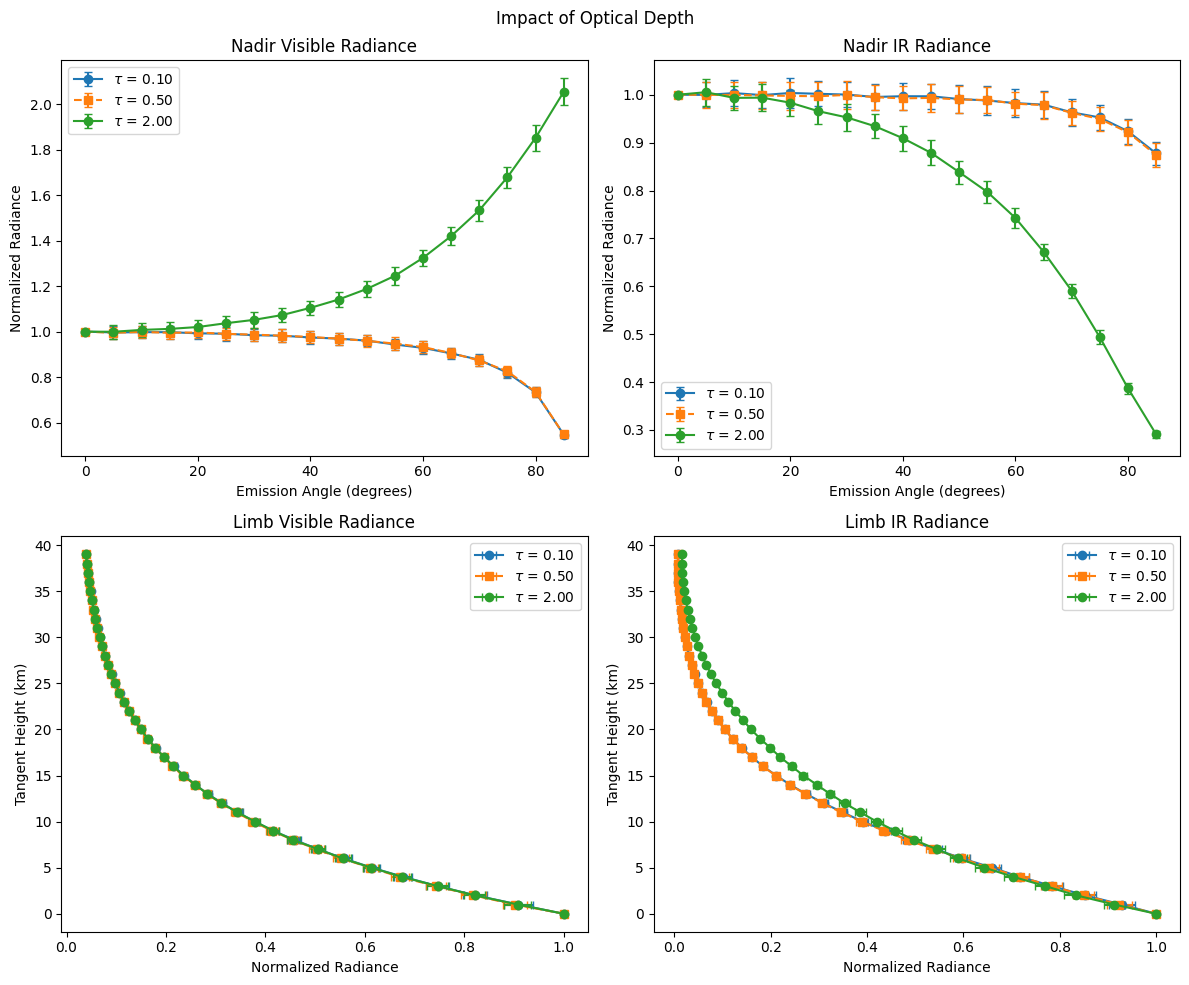

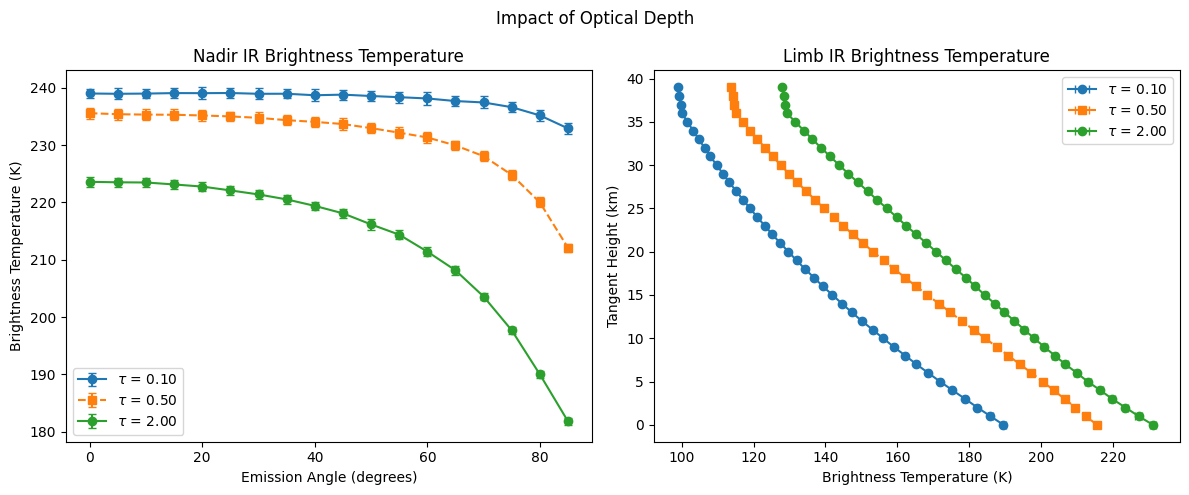

In [4]:
# Plotting the data for varying optical depth
fig1 = plot_comparison_tau(mars_obs_1, mars_obs_1, tau,
                          r'$\tau$ = {:.2f}'.format(tau[0]), 
                          r'$\tau$ = {:.2f}'.format(tau[1]),
                          r'$\tau$ = {:.2f}'.format(tau[2]),
                          'Impact of Optical Depth')

fig2 = plot_brightness_temps_tau(mars_obs_1, mars_obs_1, tau,
                          r'$\tau$ = {:.2f}'.format(tau[0]), 
                          r'$\tau$ = {:.2f}'.format(tau[1]),
                          r'$\tau$ = {:.2f}'.format(tau[2]),
                          'Impact of Optical Depth')
plt.show()

In [5]:
# Setting parameters
scale_height_low = 5e3 
scale_height_high = 15e3 

#calculating for varying scale heights
mars_obs_2 = MarsSyntheticData(H_dust = scale_height_low)
mars_obs_3 = MarsSyntheticData(H_dust = scale_height_high)

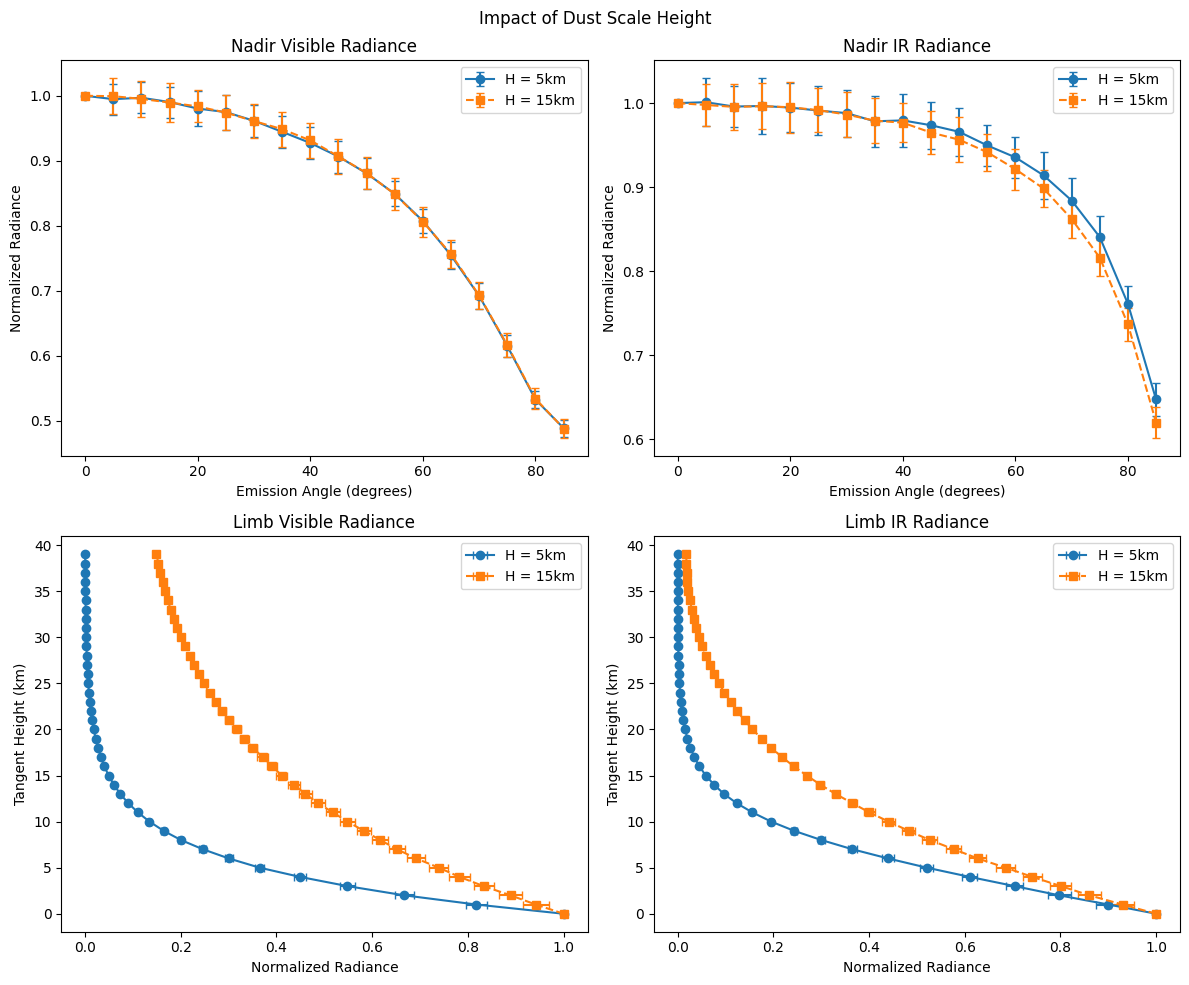

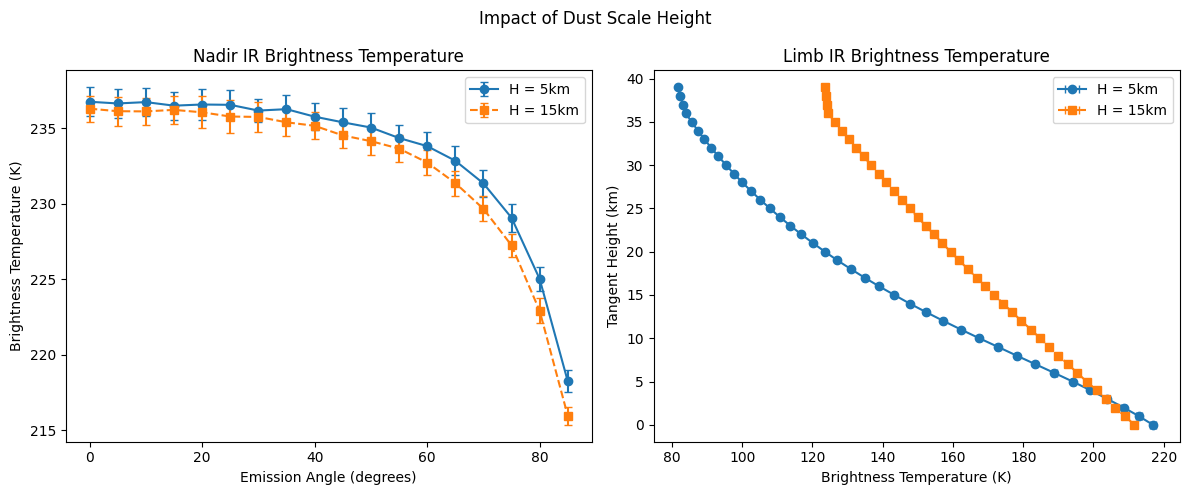

In [6]:
#plotting comparisons
fig3 = plot_comparison(mars_obs_2, 
                mars_obs_3, 
                'H = {}km'.format(int(scale_height_low/1e3)),
                'H = {}km'.format(int(scale_height_high/1e3)), 
                'Impact of Dust Scale Height')

fig4 = plot_brightness_temps(mars_obs_2, 
                mars_obs_3, 
                'H = {}km'.format(int(scale_height_low/1e3)),
                'H = {}km'.format(int(scale_height_high/1e3)), 
                'Impact of Dust Scale Height')

plt.show()

#### How does limb/nadir radiance ratio vary with optical depth?

For optically thin regimes ($\tau < 1$), the ratio between limb/nadir viewing doesn't change very much for varying optical depths. However, for optically thick regimes ($\tau > 1$), the ratio varies significantly.

#### What is the effect of scale height on limb profile shapes?

Scale height dramatically decreases the slope of limb profile shapes.

#### Which viewing geometries best constrain $\tau$ and H?

There seems to be large degeneracies in the radiance as a function or emission angle and tangent height for nadir profiles. Therefore, limb viewing would be best to characterize optical depth and scale height.

## 2. Spectral Sensitivity

In [28]:
# Setting parameters
center_wavelenghts = np.array([12e-6, 22e-6])
narrow_bandpass = 0.5e-6
broad_bandpass = 2e-6

In [29]:
# Calculating for varying center wavelength and bandpass
obs1 = MarsSyntheticData(ir_center = center_wavelenghts[0], ir_width = narrow_bandpass)
obs2 = MarsSyntheticData(ir_center = center_wavelenghts[1], ir_width = narrow_bandpass)

obs3 = MarsSyntheticData(ir_center = center_wavelenghts[0], ir_width = broad_bandpass)
obs4 = MarsSyntheticData(ir_center = center_wavelenghts[1], ir_width = broad_bandpass)

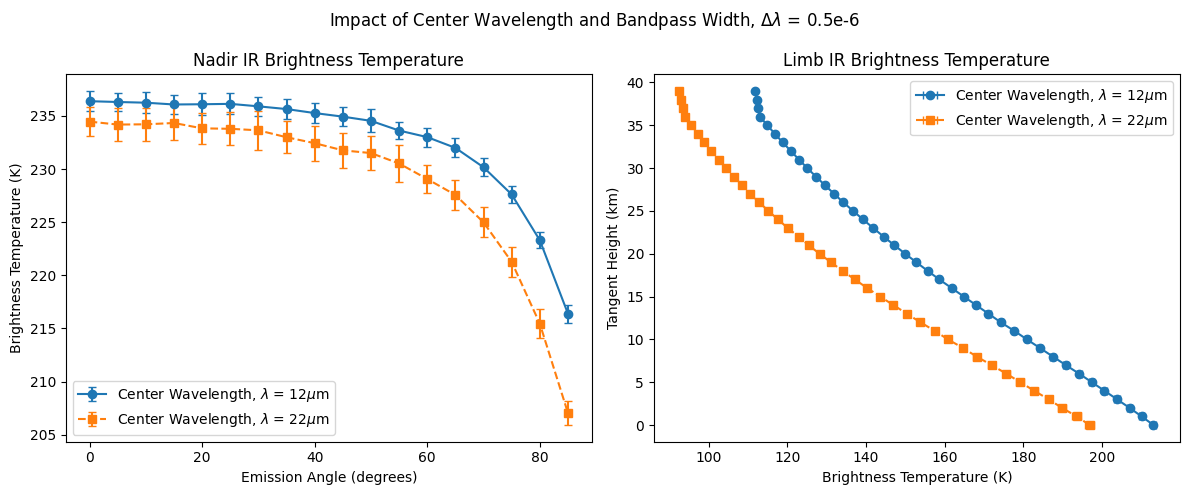

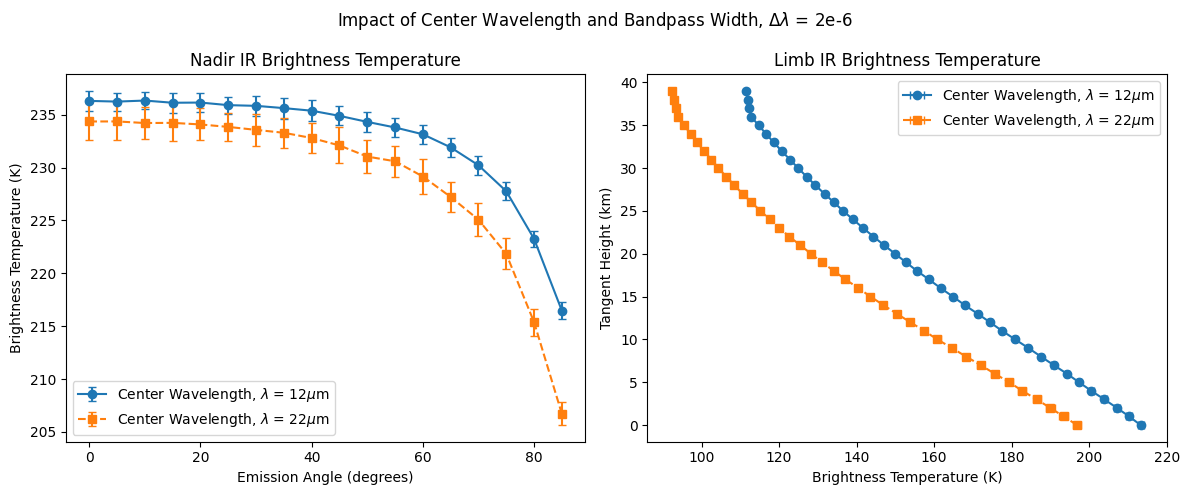

In [30]:
# Plotting comparisons
fig5 = plot_brightness_temps(obs1, obs2, 
                          'Center Wavelength, $\lambda$ = 12$\mu$m', 
                          'Center Wavelength, $\lambda$ = 22$\mu$m',
                          r'Impact of Center Wavelength and Bandpass Width, $\Delta \lambda$ = 0.5e-6')

fig6 = plot_brightness_temps(obs3, obs4, 
                          'Center Wavelength, $\lambda$ = 12$\mu$m', 
                          'Center Wavelength, $\lambda$ = 22$\mu$m',
                          r'Impact of Center Wavelength and Bandpass Width, $\Delta \lambda$ = 2e-6')

#### How does dust optical depth affect temperature sensitivity at different atmospheric levels and the surface?

Optical depth is inversely proportional to teh measured intentisty of light coming into the detector:

$ I = I_{0} e^{-\tau} $

and since the intensity of light is directly proportional to temperature, your temperature sensitivity decreases with increasing optical depth. Increasing optical depth corresponds to viewing deeper into an atmosphere from above, so it will be harder to characterize the surface temperature than it will be to characterize the temperature at the top of an atmosphere.

#### Which wavelength/bandpass combinations are optimal for:

##### 1. Surface temperature measurements

The bandpass width does not seem to have a large impact on the nadir or limb profiles. However, there is a significant impact from decreasing your center wavelength. To measure the surface temperature, I'd go with a smaller center wavelength.

##### 2. Atmospheric temperature profiling

Again, the bandpass width does not seem to have a significant impact on the nadir or limb brightness temperature profiles. To profile an atmosphere, I'd go with a smaller center wavelength and limb viewing, since there is a larger impact of different center wavelengths in limb viewing geometries.

#### Explain the wavelength and bandpass width dependence

Bandpass width does not seem to have a significant impact on brightness temperature profiles, from nadir or limb viewing geometries. However, with smaller center wavelengths, the slope of the profile gets smaller, and we can probe deeper into an atmosphere.

## 3. Scattering Properties

In [31]:
# Calculating absorbing case
w0_absorb = 0.01
g_absorb = 0.1

mars_obs_absorb = MarsSyntheticData(single_scatter_albedo_vis = w0_absorb, 
                                       asymmetry_parameter_vis = g_absorb)


In [32]:
# Calculating Scattering case
w0_scatter = 0.99
g_scatter = 0.9

mars_obs_scatter = MarsSyntheticData(single_scatter_albedo_vis = w0_scatter, 
                                       asymmetry_parameter_vis = g_scatter)

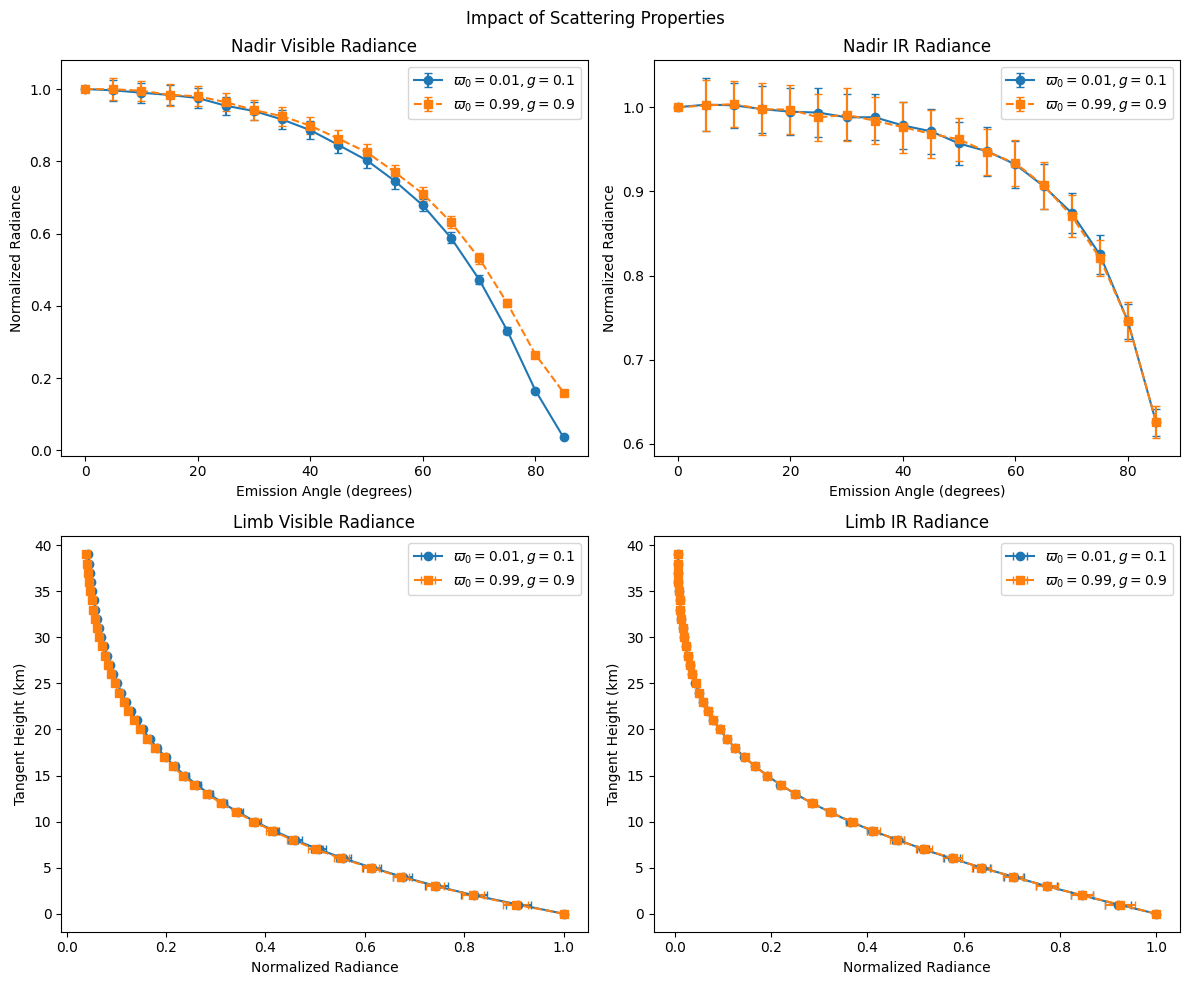

In [33]:
# Plotting comparison
fig7 = plot_comparison(mars_obs_absorb, mars_obs_scatter, 
                r'$\varpi_0 = 0.01, g = 0.1$',
                r'$\varpi_0 = 0.99, g = 0.9$', 
                'Impact of Scattering Properties')
plt.show()

#### Explain:

##### Physical meaning of ϖ0 and g

The single scattering albedo is a measure of the ratio of scattering vs absorbing efficiency. The asymmetry parameter is a measure of all the cosines of the scattering/incident angles in the system.

##### Why visible observations are more sensitive to these parameters

There seems to be less degeneracies for varying emission angles and tangent heights for the visible observations than the IR observations at smaller tangent heights/larger emission angles.

##### How these parameters could be constrained from observations

Measurements of nadir visible radiance as a function of emission angle seems to be the best method for constraining the single scattering albedo and the asymmetry parameter.

## 4. Synthesis

### Dust Vertical Distribution

From part 1, it seems like limb IR brightness temperature as a function of tangent height is most sensitive to changes in scale height. Therefore, I'd gather data on brightness temperature for varying tangent heights. Then I'd model brightness temperature (as done in part 2), and fit my data to my model to find the scale height that best fits my data. 

### Total Dust Optical Depth

From part 1, it seems like there's strong degeneracies for the radiance at varying optical depths as a function of emission angle, in both the IR and visible regimes. However, brightness temperature for limb viewing as a function of emission angle or tangent height seems to vary widely for varying optical depths. To characterize the total dust optical depth, I'd gather information on brightness temperature at varying emission angles/tangent heights, from limb viewing. I'd then model the brightness temperature for an array of optical depths (as in part 1) and fit my data to my model.

### Atmospheric Temperature Structure

From part 2, it seems like the chosen center wavelength and bandpass width doesn't dramatically impact nadir viewing, for varying emission angle or tangent height. For limb viewing, however, these seems to be a larger impact for center wavelength (not so much with varying bandpass width) for varying tangent heights. To characterize atmospheric temperarture structure, I'd first choose a center wavelength that best fits the object I'm observing. Then, I'd observe from the limb, and gather information on brightness temperature as a function of tangent height.